<a href="https://colab.research.google.com/github/ankit-verma2000/FlipItNews_NLP/blob/main/NLP_FlipItNews(s).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP: FlipItNews**

* FlipItNews is transforming the Indian finance, business, and investment
landscape using AI and ML.
* This case focuses on harnessing natural language processing to categorize
news articles, a critical component for delivering relevant content to users.
* By analyzing its internal database of news articles, FlipItNews aims to
intelligently categorize content into domains like politics, technology, sports,
business, and entertainment.
* The insights from this analysis can significantly improve content discovery and
user engagement, driving financial literacy and investment awareness among millennials and first-time investors.

## Objective:

The goal of this project is to use a bunch of news articles extracted from the companies internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

# **FlipItNews Data:**

* Each row in this dataset corresponds to a unique news article, and each column
represents features crucial for categorizing the content. The dataset 'FlipItNews Data'
includes the following variables:
1. Article: The full text of the news article.
2. Category: The actual category of the news article (such as politics, technology,
sports, business, and entertainment).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
df = pd.read_csv('/content/flipitnews-data.csv')

df.sample(5)

,Category,Article
1287,Business,ericsson sees earnings improve telecoms equipm...
1144,Business,mcdonald s to sponsor mtv show mcdonald s the...
1400,Technology,be careful how you code a new european directi...
613,Politics,student fee factor played down a rise has be...
673,Politics,msps hear renewed climate warning climate chan...


In [ ]:
print('Shape of Dataset - \n',df.shape)

print('Total No. of Uniue News Articles - \n',df['Category'].nunique(),':',df['Category'].unique())

#print('News Article per category - \n',df['Category'].value_counts())

#print('\nInfo - \n',df.info)

Shape of Dataset - 
 (2225, 2)
Total No. of Uniue News Articles - 
 5 : ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics']


# Preliminary Analysis:


In [ ]:
print('Total News Article Per category: \n')
df.Category.value_counts()

Total News Article Per category: 



,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


In [ ]:
print('Descriptive analysis: \n')
df.describe()

Descriptive analysis: 



,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [ ]:
from pprint import pprint

pprint(df.iloc[1].to_dict(), compact=True)

{'Article': 'worldcom boss  left books alone  former worldcom boss bernie '
            'ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  '
            'never made accounting decisions  a witness has told jurors.  '
            'david myers made the comments under questioning by defence '
            'lawyers who have been arguing that mr ebbers was not responsible '
            'for worldcom s problems. the phone company collapsed in 2002 and '
            'prosecutors claim that losses were hidden to protect the firm s '
            'shares. mr myers has already pleaded guilty to fraud and is '
            'assisting prosecutors.  on monday  defence lawyer reid weingarten '
            'tried to distance his client from the allegations. during cross '
            'examination  he asked mr myers if he ever knew mr ebbers  make an '
            'accounting decision  .  not that i am aware of   mr myers '
            'replied.  did you ever know mr ebbers to make an account

<ipython-input-18-7ccd0a34ef7a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= 'Category',palette='Set2')


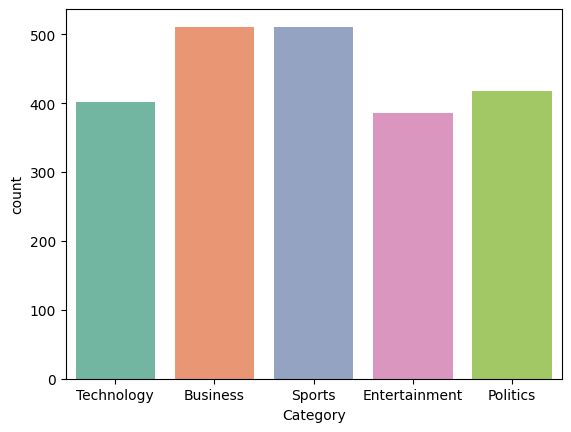

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x= 'Category',palette='Set2')
plt.show()

# Text Preprocessing:

In [ ]:
# Created a function to do the preprocessing of the text data:
def preprocess_text(text):
    # Remove non-letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [ ]:
df['Processed_Article'] = df['Article'].apply(preprocess_text)

In [ ]:
df.head()

,Category,Article,Processed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


# Encoding Target Variable:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])

In [ ]:
df.sample(5)

,Category,Article,Processed_Article,Category_Encoded
199,Business,card fraudsters targeting web new safeguards...,card fraudsters targeting web new safeguard cr...,0
1567,Entertainment,brookside creator s channel 4 bid the creator ...,brookside creator channel bid creator defunct ...,1
1178,Technology,bbc web search aids odd queries the bbc s onli...,bbc web search aid odd query bbc online search...,4
605,Sports,parry firm over gerrard listen to the full int...,parry firm gerrard listen full interview sport...,3
2026,Politics,job cuts false economy - tuc plans to shed ...,job cut false economy tuc plan shed civil serv...,2


# Transforming data:
Create an option for the user to choose between Bag of Words and TF-IDF techniques for vectorizing the data.

In [ ]:
# choice = input("Choose vectorization method (1 for Bag of Words, 2 for TF-IDF): ")

# if choice == '1':
#     vectorizer = CountVectorizer()
# else:
#     vectorizer = TfidfVectorizer()

# X = vectorizer.fit_transform(df['Processed_Article'])
# y = df['Category_Encoded']

In [ ]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
bow = cv.fit_transform(df['Processed_Article'])
# print("\nVocabulary:")

vocab_items = list(cv.vocabulary_.items())[:10]

for word, index in vocab_items:
    print(f"{word}: {index}")

# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())

tv: 22809
future: 8824
hand: 9758
viewer: 23640
home: 10327
theatre: 22104
system: 21712
plasma: 16582
high: 10175
definition: 5610
Bag of Words Matrix: (2225, 24718)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# TFIDF - Term Frequency/Inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
#print(tfidf.idf_)
TFIDF = tfidf.fit_transform(df['Processed_Article'])
print("\nVocabulary:")
vocab_items_tfidf = list(tfidf.vocabulary_.items())[:10]
for word, index in vocab_items_tfidf:
    print(f"{word}: {index}")
#print(tfidf.vocabulary_)

# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())


Vocabulary:
tv: 22809
future: 8824
hand: 9758
viewer: 23640
home: 10327
theatre: 22104
system: 21712
plasma: 16582
high: 10175
definition: 5610
TFIDF Matrix: (2225, 24718)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
TFIDF.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X=df['Processed_Article']
y=df['Category_Encoded']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780,), (445,), (1780,), (445,))

#  **Model Training & Evaluation**

Simple Approach

1. Naive Bayes

## **Confusioin Matrix:**

In [ ]:
def conf_matrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  conf_mat = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_mat, annot=True, xticklabels = df['Category'].unique(), yticklabels=df['Category'].unique(), cmap="Purples", fmt='g')


(1780,) (445,) (1780,) (445,)
accuracy: 0.9595505617977528
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       101
           1       1.00      0.89      0.94        81
           2       0.92      0.98      0.95        83
           3       0.99      1.00      0.99        98
           4       0.95      0.98      0.96        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



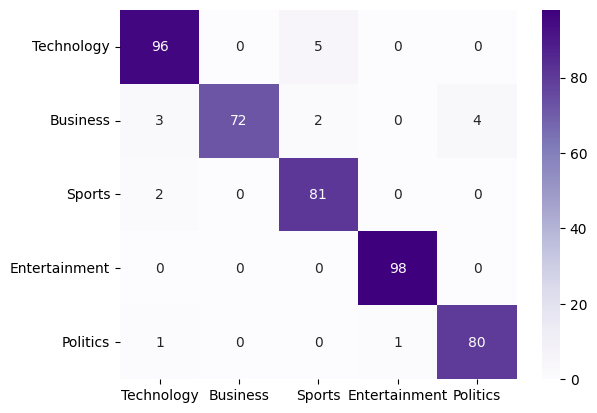

In [ ]:
# library:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X=df['Processed_Article']
y=df['Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

nb = Pipeline([('vect', CountVectorizer()), #Converts text data into a Bag of Words (BoW) representation
               ('tfidf', TfidfTransformer()), # Transforms BoW into TF-IDF format (which normalizes term frequency by inverse document frequency).
               ('clf', MultinomialNB()),# Naive Bayes classifier for text data.
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test) # Predicts the categories for the test set articles.

print(f'accuracy: {accuracy_score(y_pred, y_test)}') # evaluates how well the model predicts the correct categories for the test set.

print(classification_report(y_test, y_pred)) # Provides precision, recall, and F1-score for each class (category).
conf_matrix(y_test, y_pred) # representation of the true vs predicted values


2. **SGDClassifier**: used for Large-scale datasets and real-time predictions.


accuracy: 0.9685393258426966
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       101
           1       0.99      0.98      0.98        81
           2       0.93      0.98      0.95        83
           3       0.98      1.00      0.99        98
           4       0.99      0.98      0.98        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

Confusion Matrix:



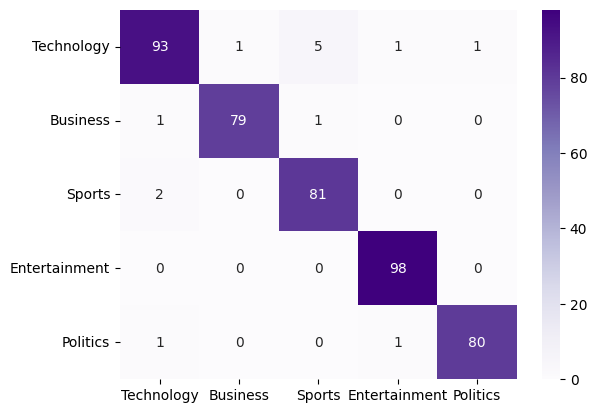

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(f'accuracy: {accuracy_score(y_pred, y_test)}')

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:\n')
conf_matrix(y_test, y_pred)


3. Logistic Regression:

accuracy: {0.9662921348314607}
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       101
           1       0.99      0.95      0.97        81
           2       0.93      0.98      0.95        83
           3       0.98      1.00      0.99        98
           4       0.98      0.98      0.98        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



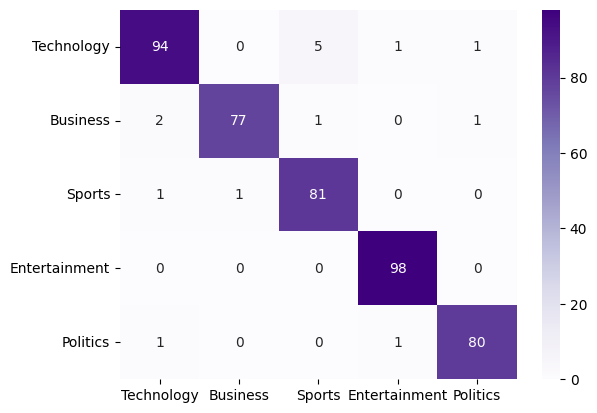

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs = 1, C = 1e5, max_iter=1000)),
               ])
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f'accuracy:', {accuracy_score(y_pred, y_test)})
print(classification_report(y_test, y_pred))

conf_matrix(y_test, y_pred)

# Advance Techniques:

1. Decision Tree

2. Nearest Neighbors

3. Random Forest

1. **Decision Tree:**

Most powerful tools of supervised learning algorithms used for both classification and regression tasks.

DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

In [ ]:
df.columns

Index(['Category', 'Article', 'Processed_Article', 'Category_Encoded'], dtype='object')

accuracy:0.898876404494382
               precision    recall  f1-score   support

   Technology       0.88      0.96      0.91        90
     Business       0.88      0.88      0.88        80
       Sports       0.93      0.80      0.86        87
Entertainment       0.93      0.95      0.94       110
     Politics       0.87      0.88      0.88        78

    micro avg       0.90      0.90      0.90       445
    macro avg       0.90      0.89      0.89       445
 weighted avg       0.90      0.90      0.90       445
  samples avg       0.90      0.90      0.90       445



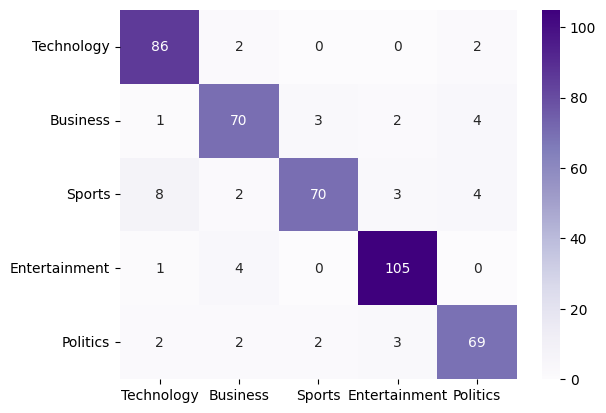

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X = cv.fit_transform(df['Processed_Article']).toarray()
y = cv.fit_transform(df['Category']).toarray()
# split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Decision Tree Model:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'accuracy:{accuracy_score(y_test,y_pred)}')

print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))

conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

[Text(0.625, 0.875, 'x[22425] <= 0.5\ngini = 0.319\nsamples = 1780\nvalue = [[1360, 420]\n[1474, 306]\n[1450, 330]\n[1379, 401]\n[1457, 323]]'),
 Text(0.5, 0.625, 'x[23401] <= 0.5\ngini = 0.315\nsamples = 1631\nvalue = [[1211, 420]\n[1325, 306]\n[1450, 181]\n[1230, 401]\n[1308, 323]]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[2429] <= 0.5\ngini = 0.31\nsamples = 1480\nvalue = [[1066.0, 414.0]\n[1174.0, 306.0]\n[1299.0, 181.0]\n[1079.0, 401.0]\n[1302.0, 178.0]]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'x[6792] <= 0.5\ngini = 0.031\nsamples = 151\nvalue = [[145, 6]\n[151, 0]\n[151, 0]\n[151, 0]\n[6, 145]]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 149\nvalue = [[149, 0]\n[149, 0]\n[0, 149]\n[149, 0]\n[149, 0]]'),
 Text(0.6875, 0.75, '  False')]

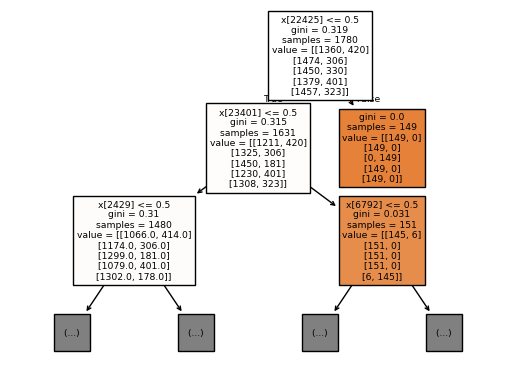

In [ ]:
plot_tree(model,filled=True,max_depth=2)

2. KNearest neighbour:

accuracy:0.597752808988764
               precision    recall  f1-score   support

   Technology       0.96      0.49      0.65       109
     Business       0.94      0.40      0.56        78
       Sports       0.94      0.59      0.72        80
Entertainment       0.40      1.00      0.57       104
     Politics       1.00      0.42      0.59        74

    micro avg       0.62      0.60      0.61       445
    macro avg       0.85      0.58      0.62       445
 weighted avg       0.83      0.60      0.62       445
  samples avg       0.60      0.60      0.60       445



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


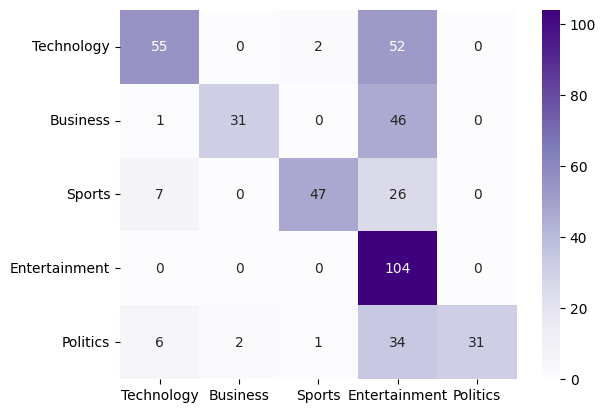

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5 , metric='euclidean')

X = cv.fit_transform(df['Processed_Article']).toarray()
y = cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(f'accuracy:{accuracy_score(y_test,y_pred)}')

print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))

conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

3. Random Forest:

accuracy:0.8337078651685393
               precision    recall  f1-score   support

   Technology       0.99      0.86      0.92       100
     Business       1.00      0.85      0.92        79
       Sports       1.00      0.69      0.82        74
Entertainment       1.00      1.00      1.00       108
     Politics       1.00      0.70      0.83        84

    micro avg       1.00      0.83      0.91       445
    macro avg       1.00      0.82      0.90       445
 weighted avg       1.00      0.83      0.90       445
  samples avg       0.83      0.83      0.83       445



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


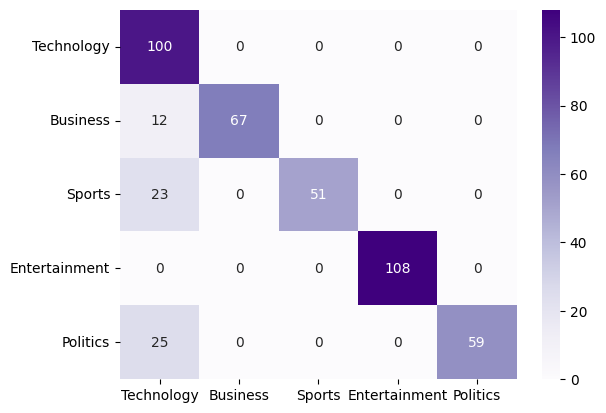

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X = cv.fit_transform(df['Processed_Article']).toarray()
y = cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

RFC = RandomForestClassifier(random_state=7,criterion='gini')
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)


print(f'accuracy:{accuracy_score(y_test,y_pred)}')

print(classification_report(y_test,y_pred,target_names = df['Category'].unique()))

conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# **Questionnaires**

1. How many news articles are present in the dataset that we have?
* There were total 5 news articles are present in the dataset which are **['Technology', 'Business', 'Sports', 'Entertainment', 'Politics']**
---
2. Most of the news articles are from _____ category.
* Most of the news articles are from **Sports category**.
---

3. Only ___ no. of articles belong to the ‘Technology’ category.
* Only **401** number of articles belongs to Technolog category.
---

4. What are Stop Words and why should they be removed from the text data?
* **Stop words** are the common words in a language that are often removed from text data during preprocessing in natural language processing (NLP) tasks.
* These words typically include articles, prepositions, conjunctions, and pronouns (e.g., "the," "is," "in," "and," "to," "with").
* They usually carry little meaningful information on their own and are common across most texts.
* **Why they should be removed from the text data?**
1. Irrelevance to the Meaning:It doesn't contribute significantly to the content or meaning of a sentence
2. Improving Model Efficiency: Removing stop words reduces the size of the text data (dimensionality). thus less computation and Reduced memory usage.
3. Noise Reduction: they are often considered "noise" in text data because they are common and occur in almost all documents.
4. Improved Performance in Some Tasks: In tasks such as document classification, sentiment analysis, and keyword extraction, removing stop words can improve performance by ensuring that the model focuses on the more relevant words, which improves signal-to-noise ratio.
---


5. Explain the difference between Stemming and lematization.
* **Stemming and Lemmatization** are two text preprocessing techniques used in natural language processing (NLP) to reduce words to their base or root form.
* Stemming does not generate actual words where as lemmatization does generate actual words.
* Stemming is a rule based technique and is applied step by step on words without any additional context, it is much faster as compared to lemmatization which needs the entire text or POS tag to generate the root lemma correctly.
* If you need speed then stemming can be preffered else lemmatization is better in most cases.

* **Stemming is a faster but less accurate method that chops off word parts based on simple rules, sometimes producing non-dictionary terms.**
* **Lemmatization is more sophisticated and accurate, reducing words to their dictionary base form, considering context, but at the cost of computational complexity.**

---


6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?
* **TF-IDF** is generally considered more efficient than Bag of Words for tasks that require understanding the significance of words across the corpus, as it captures more meaningful insights about the text. However, Bag of Words is simpler and computationally lighter, making it more efficient for quick, basic tasks.
-------------
- Definition:
* **Bag of Words (BoW):**
Treats all words equally, assigning the same importance to every word regardless of how often it appears in different documents.
Less efficient at capturing the relevance or uniqueness of words.
* **TF-IDF:**
Weighs words based on their frequency in the document and across the corpus, giving more importance to rare but informative words.
More efficient at highlighting meaningful words.

---


7. What’s the shape of train & test data sets after performing a 75:25 split?
* X_train shape: (353,), X_test shape: (118,)
* y_train shape: (353,), y_test shape: (118,)

-----------


8. Which of the following is found to be the best-performing model..
a. Random Forest b. Nearest Neighbors c. Naive Bayes
* **Naive Bayes with 95% accuracy.**
---
9. According to this particular use case, both precision and recall are equally important.
(T/F)
* For this specific use case of categorizing news articles into different categories like politics, technology, sports, business, and entertainment, **both precision and recall are generally equally important.** Because:

* Precision is important because you want to minimize the number of incorrectly labeled articles (e.g., misclassifying a politics article as technology).

* Recall is equally important because you want to ensure that all relevant articles are captured in the correct category (e.g., ensuring that all politics-related articles are identified).

In the text classification problems like this, a balance between precision and recall ensures that the model can correctly identify as many relevant articles as possible without introducing too many misclassifications.

In [ ]:
# X = df['Processed_Article']
# y = df['Category_Encoded']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Check the shape of the train and test sets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)